In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask

import glob
from cdo import *
cdo = Cdo()
import os
import sys
from datetime import datetime

import cftime

sys.path.append('/glade/u/home/currierw/cmip_ingest/scripts')
from download import get_dataset
sys.path.append('/glade/u/home/currierw/cmip_work')
import cmipFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

# Import state vector file using geopandas
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)

Text(0.5, 1.0, 'Model: CSIRO-Mk3-6-0 - Resolution 1.84° x 1.87°')

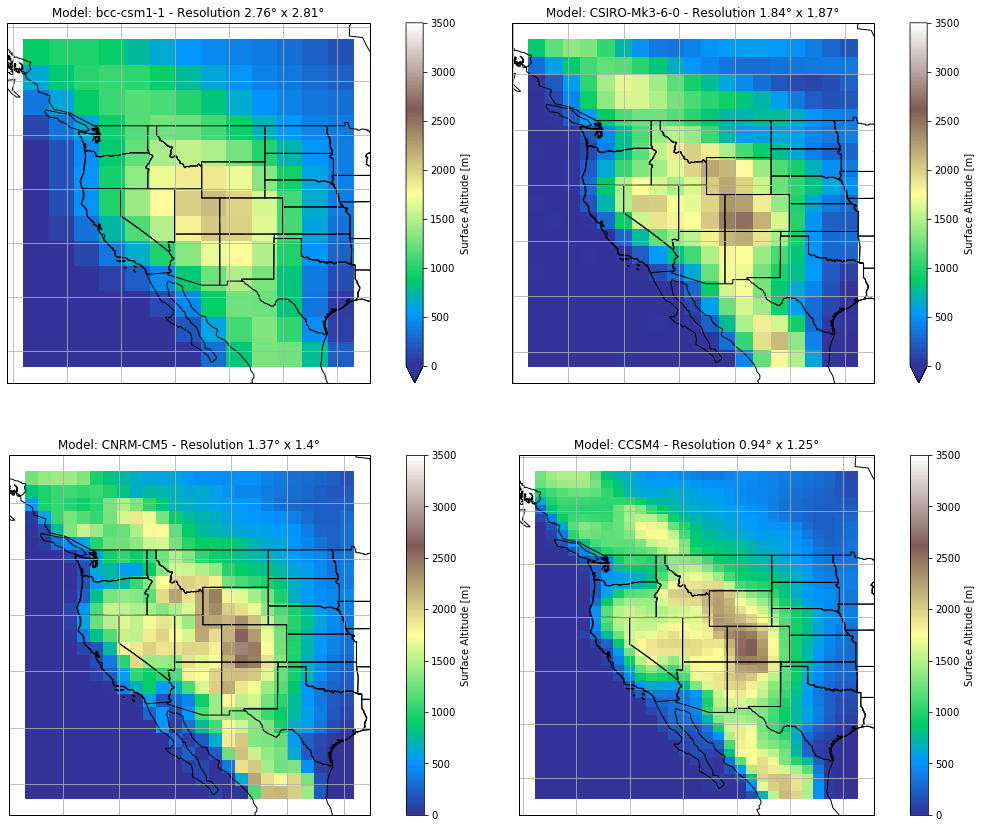

In [58]:
dsBCC=xr.open_dataset('/glade/u/home/currierw/scratch/bcc-csm1-1/historical/forcing/bcc-csm1-1_6hrLev_historical_r1i1p1_19500101-19600101_subset.nc')
dsCCSM=xr.open_dataset('/glade/u/home/currierw/scratch/CCSM4/historical/forcing/CCSM4_6hrLev_historical_r6i1p1_19500101-19600101_subset.nc')
dsCNRM=xr.open_dataset('/glade/u/home/currierw/scratch/CNRM-CM5/historical/forcing/CNRM-CM5_6hrLev_historical_r1i1p1_19500101-19600101_subset.nc')
dsCSIR=xr.open_dataset('/glade/u/home/currierw/scratch/CSIRO-Mk3-6-0/historical/forcing/CSIRO-Mk3-6-0_6hrLev_historical_r1i1p1_19500101-19600101_subset.nc')

## BCC
ax = plt.axes((0,1.2,1,1),projection=ccrs.PlateCarree())
p = dsBCC['HGT'][:,:].plot(x='lon', y='lat',transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.PlateCarree()},cmap='terrain',vmin=0, vmax=3500)
ax.coastlines();ax.gridlines();ax.add_geometries(states_gdf.geometry, crs = ccrs.PlateCarree(),facecolor='none', edgecolor='black')
ax.set_title('Model: bcc-csm1-1 - Resolution 2.76° x 2.81°')

### CCSM4
ax = plt.axes((0.7,0,1,1),projection=ccrs.PlateCarree())
p = dsCCSM['HGT'][:,:].plot(x='lon', y='lat',transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.PlateCarree()},cmap='terrain',vmin=0, vmax=3500)
ax.coastlines();ax.gridlines();ax.add_geometries(states_gdf.geometry, crs = ccrs.PlateCarree(),facecolor='none', edgecolor='black')
ax.set_title('Model: CCSM4 - Resolution 0.94° x 1.25°')

### CNRM-CM5
ax = plt.axes((0,0,1,1),projection=ccrs.PlateCarree())
p = dsCNRM['HGT'][:,:].plot(x='lon', y='lat',transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.PlateCarree()},cmap='terrain',vmin=0, vmax=3500)
ax.coastlines();ax.gridlines();ax.add_geometries(states_gdf.geometry, crs = ccrs.PlateCarree(),facecolor='none', edgecolor='black')
ax.set_title('Model: CNRM-CM5 - Resolution 1.37° x 1.4°')

### CSIRO
ax = plt.axes((0.7,1.2,1,1),projection=ccrs.PlateCarree())
p = dsCSIR['HGT'][:,:].plot(x='lon', y='lat',transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.PlateCarree()},cmap='terrain',vmin=0, vmax=3500)
ax.coastlines();ax.gridlines();ax.add_geometries(states_gdf.geometry, crs = ccrs.PlateCarree(),facecolor='none', edgecolor='black')
ax.set_title('Model: CSIRO-Mk3-6-0 - Resolution 1.84° x 1.87°')

